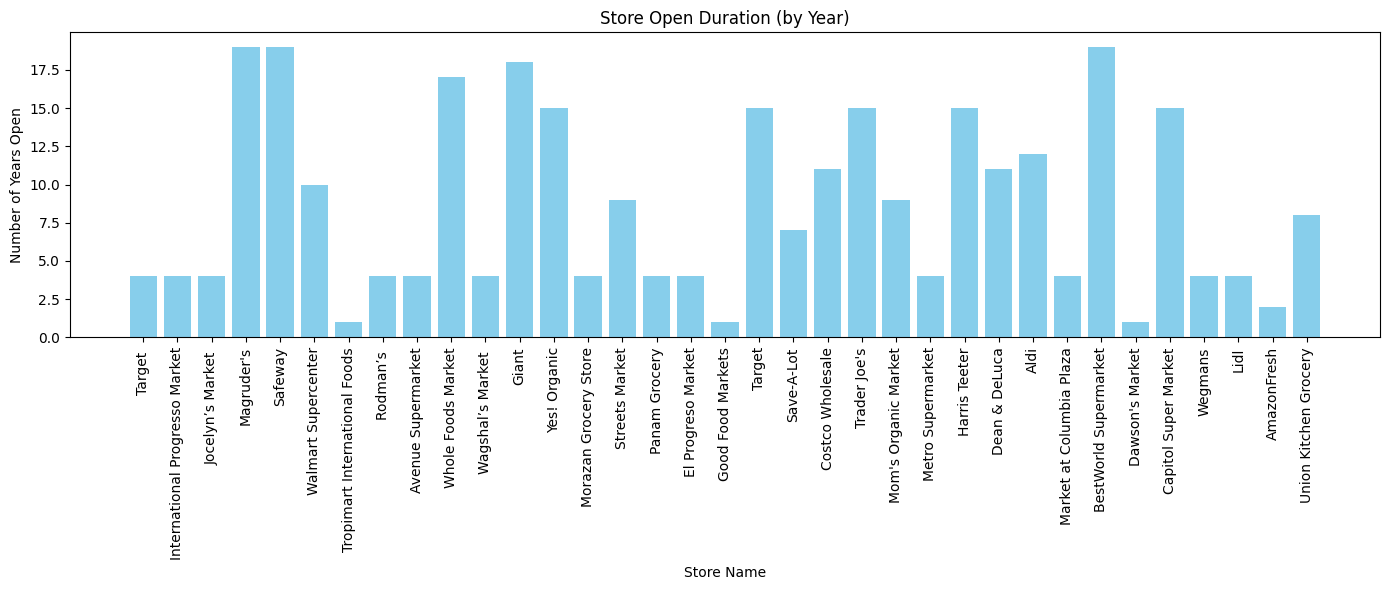

In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")
df[present_cols] = df[present_cols].replace({'Yes': 1, 'No': 0}).fillna(0).astype(int)


df['Open_Years_Count'] = df[present_cols].sum(axis=1)

plt.figure(figsize=(14, 6))
plt.bar(df['STORENAME'], df['Open_Years_Count'], color='skyblue')
plt.xlabel("Store Name")
plt.ylabel("Number of Years Open")
plt.title("Store Open Duration (by Year)")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig('store_open_duration')
plt.show()












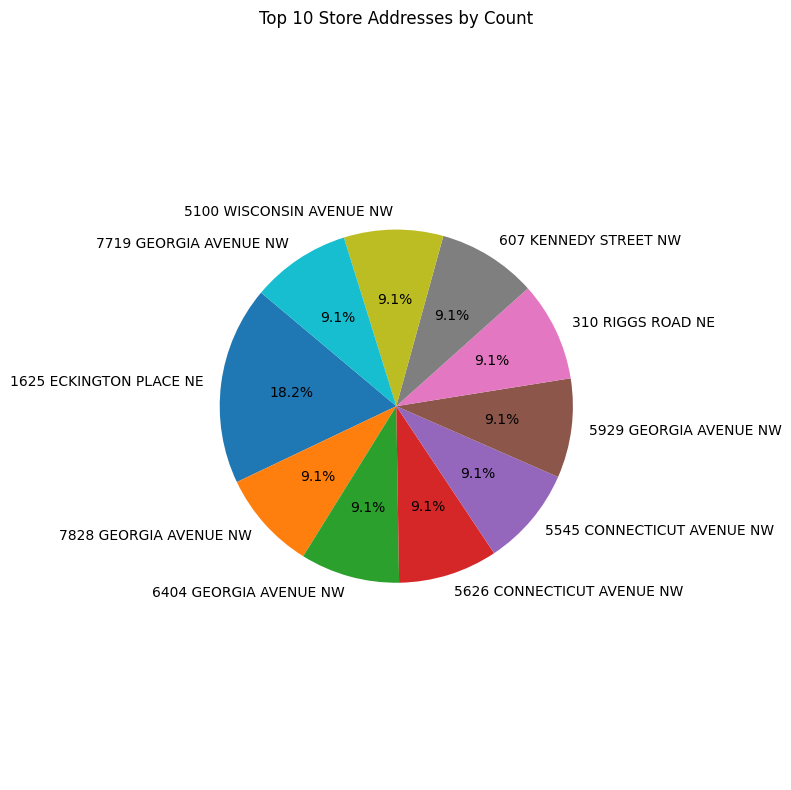

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")

store_count = df['ADDRESS'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(store_count, labels=store_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Store Addresses by Count")
plt.axis('equal') 
plt.tight_layout()
plt.savefig("top10_store_addresses_pie.png")
plt.show()







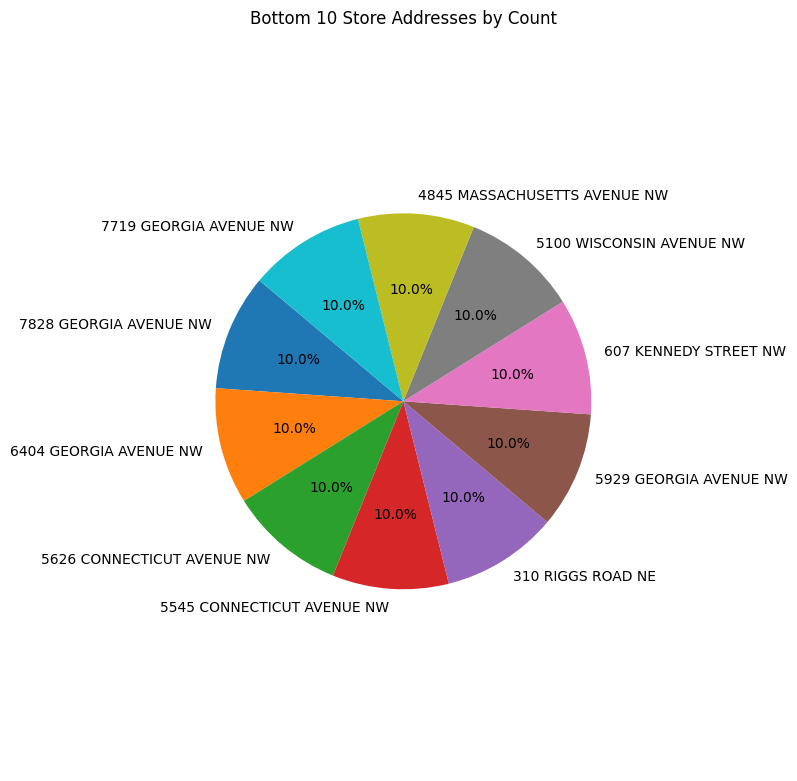

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")

least_store_count = df['ADDRESS'].value_counts().sort_values().head(10)

plt.figure(figsize=(8, 8))
plt.pie(least_store_count, labels=least_store_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Bottom 10 Store Addresses by Count")
plt.axis('equal')
plt.tight_layout()
plt.savefig("bottom10_store_addresses_pie.png")
plt.show()








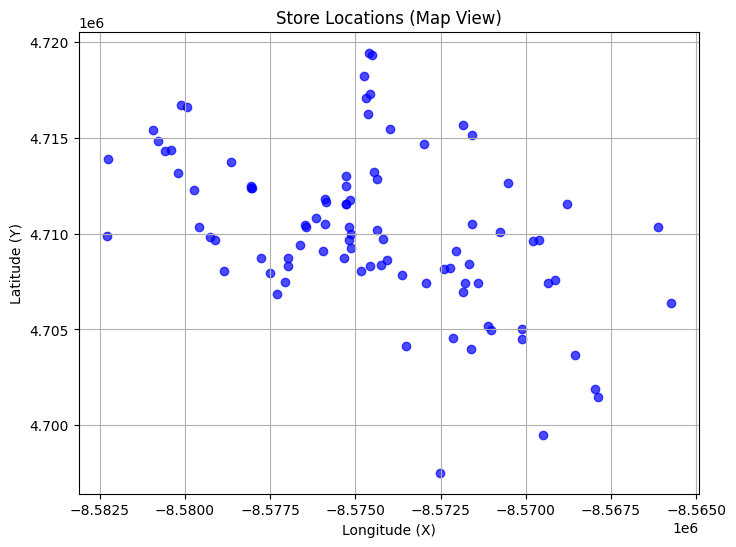

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], alpha=0.7, color='blue')
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.title("Store Locations (Map View)")
plt.grid(True)
plt.savefig("store_location_map_view.png")
plt.show()






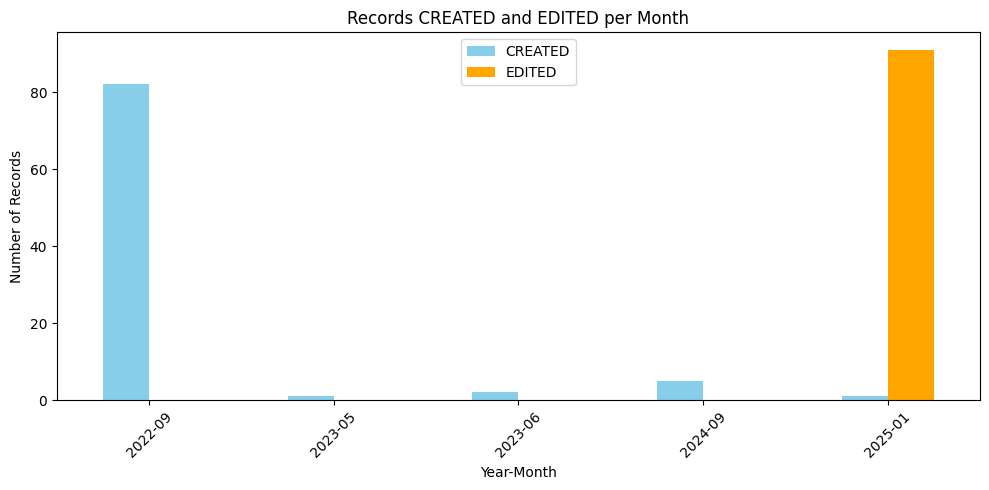

In [56]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")


# Convert to datetime
df['CREATED'] = pd.to_datetime(df['CREATED'])
df['EDITED'] = pd.to_datetime(df['EDITED'])

# Extract year-month for grouping
df['CREATED_ym'] = df['CREATED'].dt.to_period('M')
df['EDITED_ym'] = df['EDITED'].dt.to_period('M')

# Count records created and edited per month
created_counts = df.groupby('CREATED_ym').size()
edited_counts = df.groupby('EDITED_ym').size()

# Combine counts into one DataFrame for plotting
counts = pd.DataFrame({
    'CREATED': created_counts,
    'EDITED': edited_counts
}).fillna(0)


counts.plot(kind='bar', figsize=(10,5), color=['skyblue', 'orange'])
plt.title('Records CREATED and EDITED per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("record_created_and_edited_per_month.png")
plt.show()


